# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The used car dealership is interested in features that can help price (predict) the user cars appropriately.

To accomplish this goal, we need to perform the below data tasks

* Understand what features we have available in the given dataset.
* Which among these features is relevant and strongly influences the outcome (price).
* Build a model to predict the appropriate reasonable price of a used car so that it will sell.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Imports

In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Explore the dataframe

In [80]:
df = pd.read_csv('./data/vehicles.csv')

In [81]:
df.shape

(426880, 18)

In [82]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Explore Numeric Neatures

In [84]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


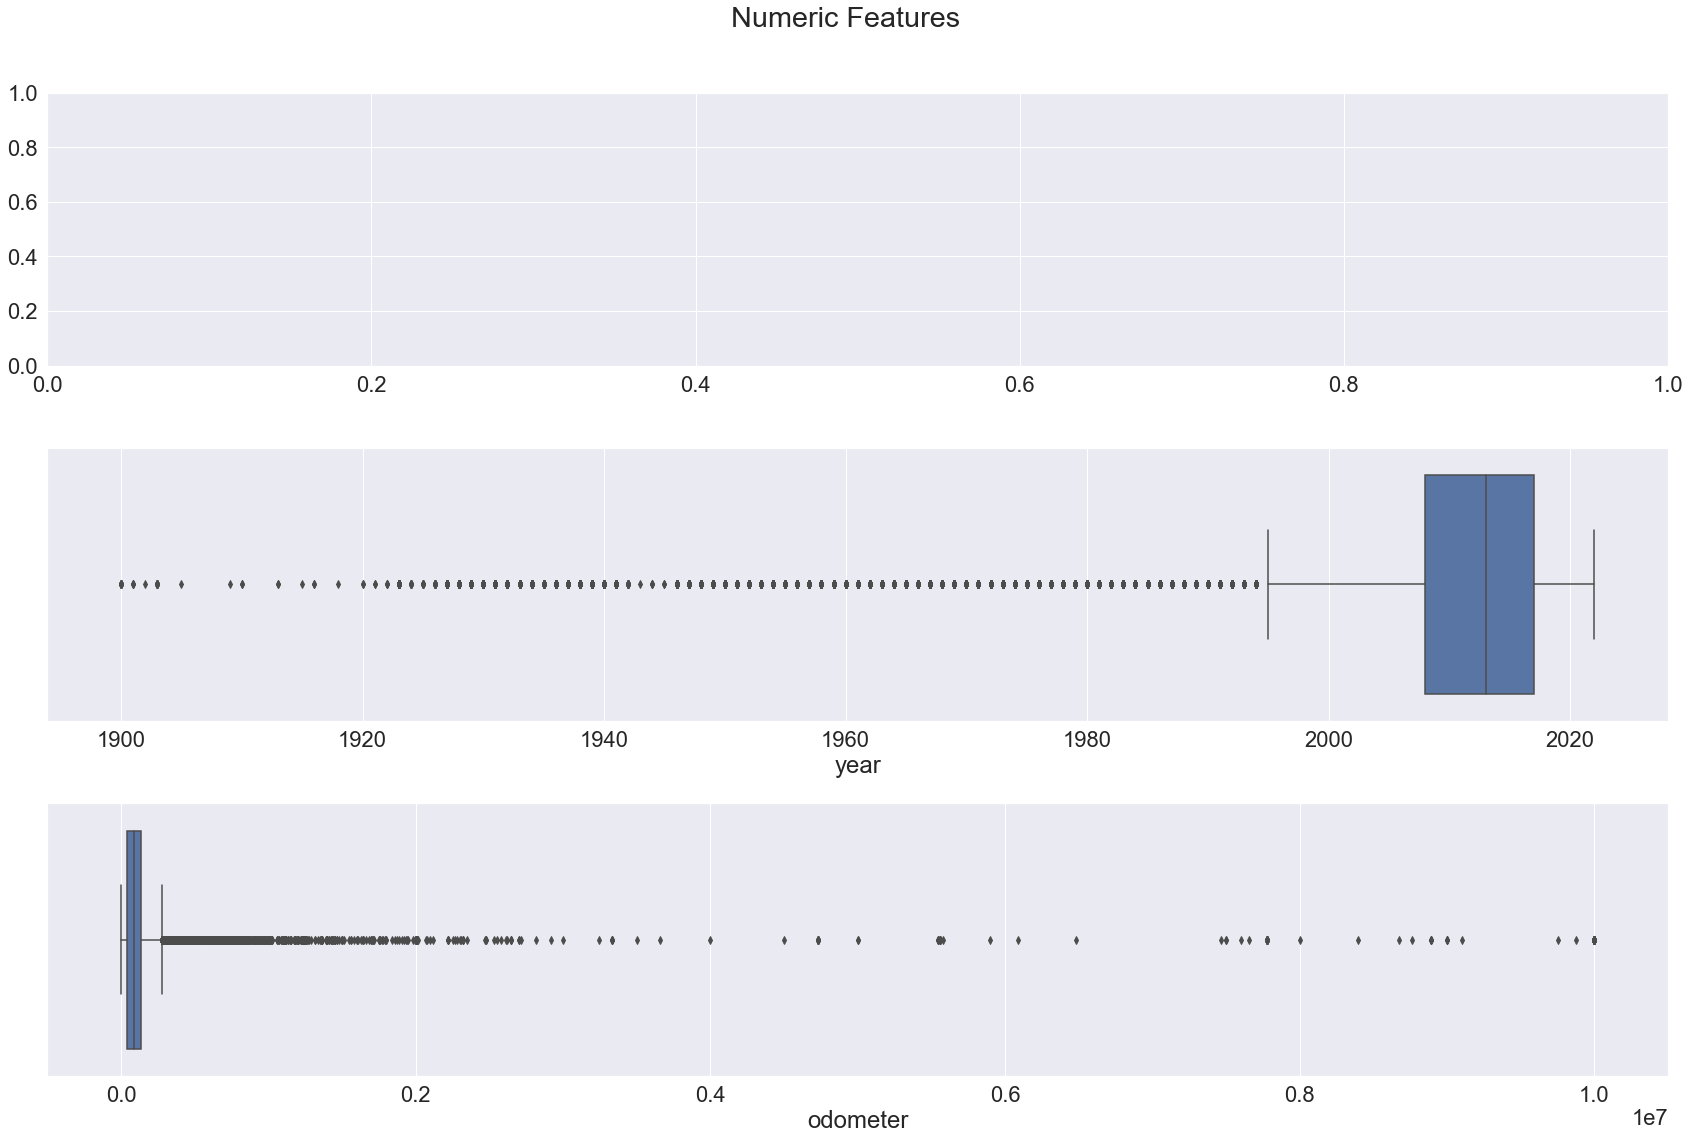

In [85]:
# Box plots for numeric features - price, year and odometer.
sns.set(font_scale = 2)

fig, ax = plt.subplots(3, 1, figsize=(24,16))
fig.suptitle('Numeric Features', y=1.)


sns.boxplot(x=df['year'], ax=ax[1])
sns.boxplot(x=df['odometer'], ax=ax[2])

fig.tight_layout()

In [86]:
# price - there are quite a bit of outliers
print(f'Number of rows without any price: ',(df[df['price'] == 0]).shape[0])
print(f'Number of rows price less than $100: ',(df[df['price'] < 100]).shape[0])

Number of rows without any price:  32895
Number of rows price less than $100:  36222


#### Explore Categorical Features

In [87]:
# Let's discover the unique counts on the object columns
unique_counts_df = pd.DataFrame(columns=['feature', 'unique_count'])

for column in df.select_dtypes(include='object').columns:
    unique_counts_df.loc[len(unique_counts_df.index)] = [column, df[column].nunique()] 
    
unique_counts_df

,feature,unique_count
0,region,404
1,manufacturer,42
2,model,29649
3,condition,6
4,cylinders,8
5,fuel,5
6,title_status,6
7,transmission,3
8,VIN,118246
9,drive,3


In [88]:
# VIN and id are similar i.e. VIN uniquely identifies the car
# VIN has a lot of null values so cannot be an index
df['VIN'].dropna().sample()

### This column can be safely dropped without any impact to our analysis or model

402369    1FTFW1E5YKFB70133
Name: VIN, dtype: object

In [89]:
# model has a large number of unqiue values, 
# there is no way to recategorize this data to smaller set of buckets 
df['model'].dropna().head()

### We can drop this column as part of the preparation step

27    sierra 1500 crew cab slt
28              silverado 1500
29         silverado 1500 crew
30        tundra double cab sr
31                   f-150 xlt
Name: model, dtype: object

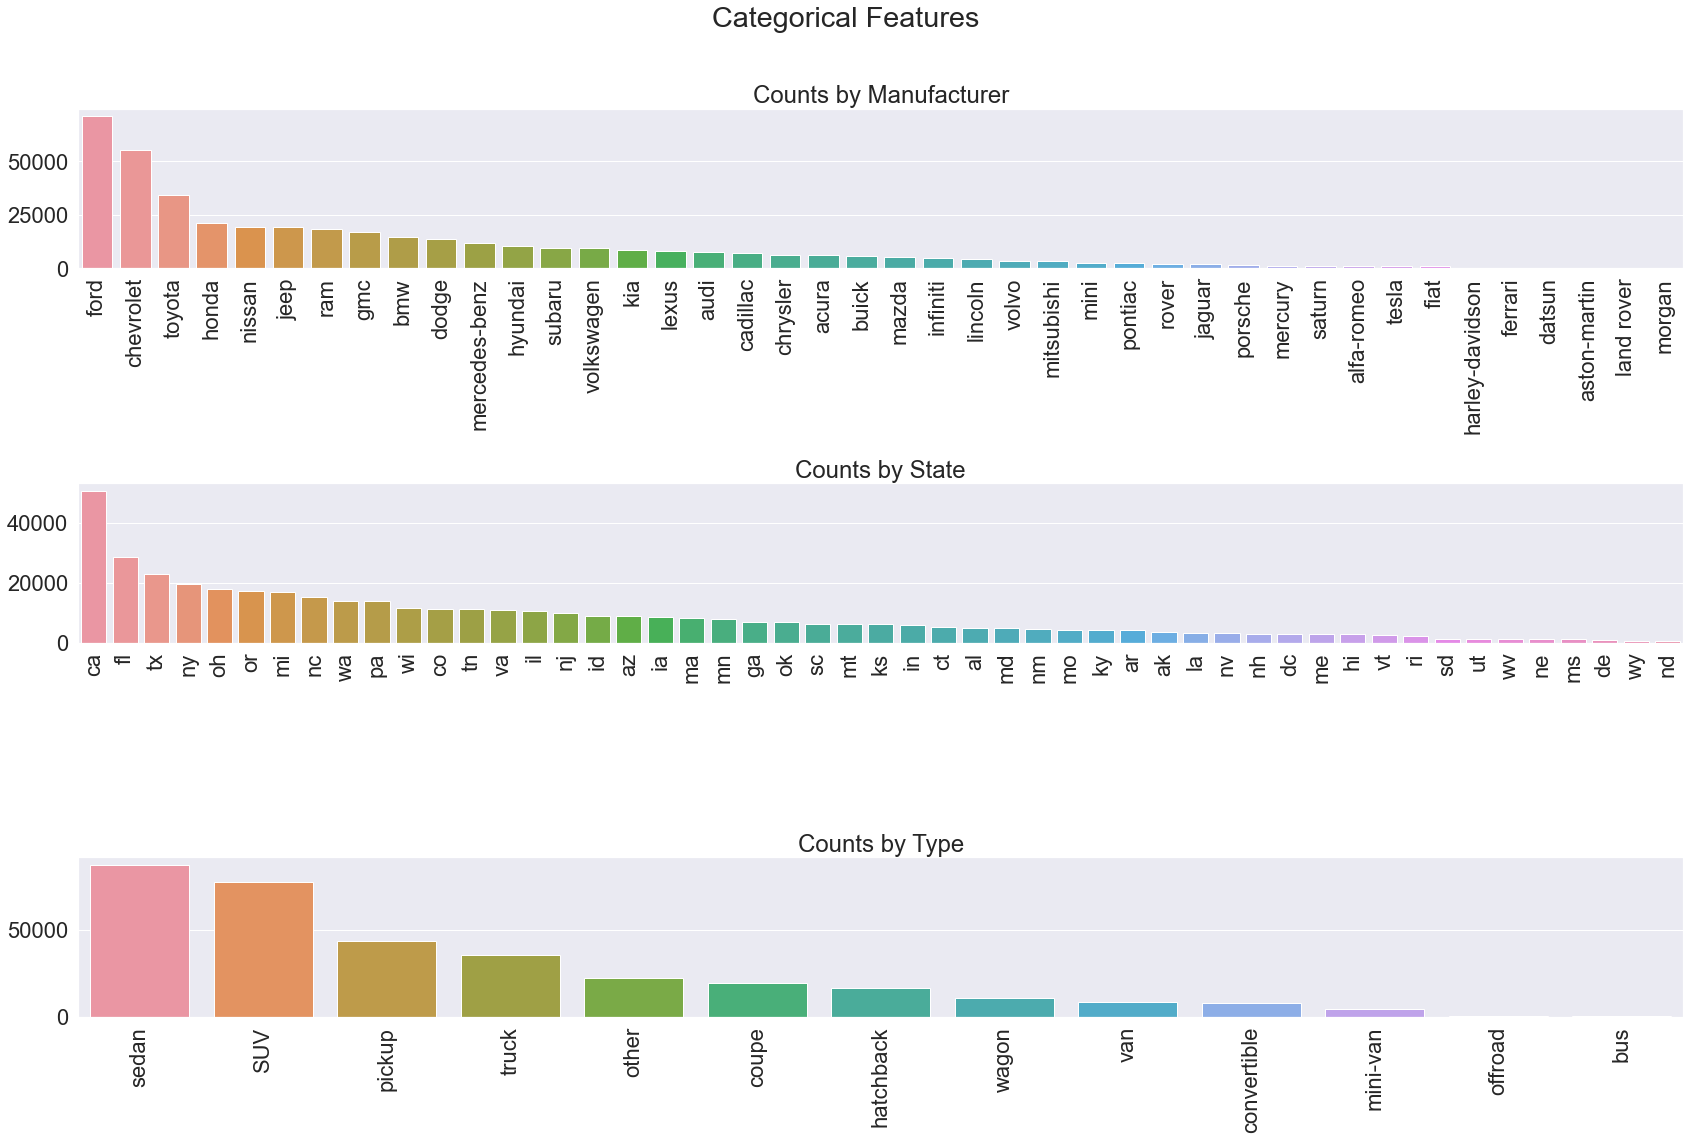

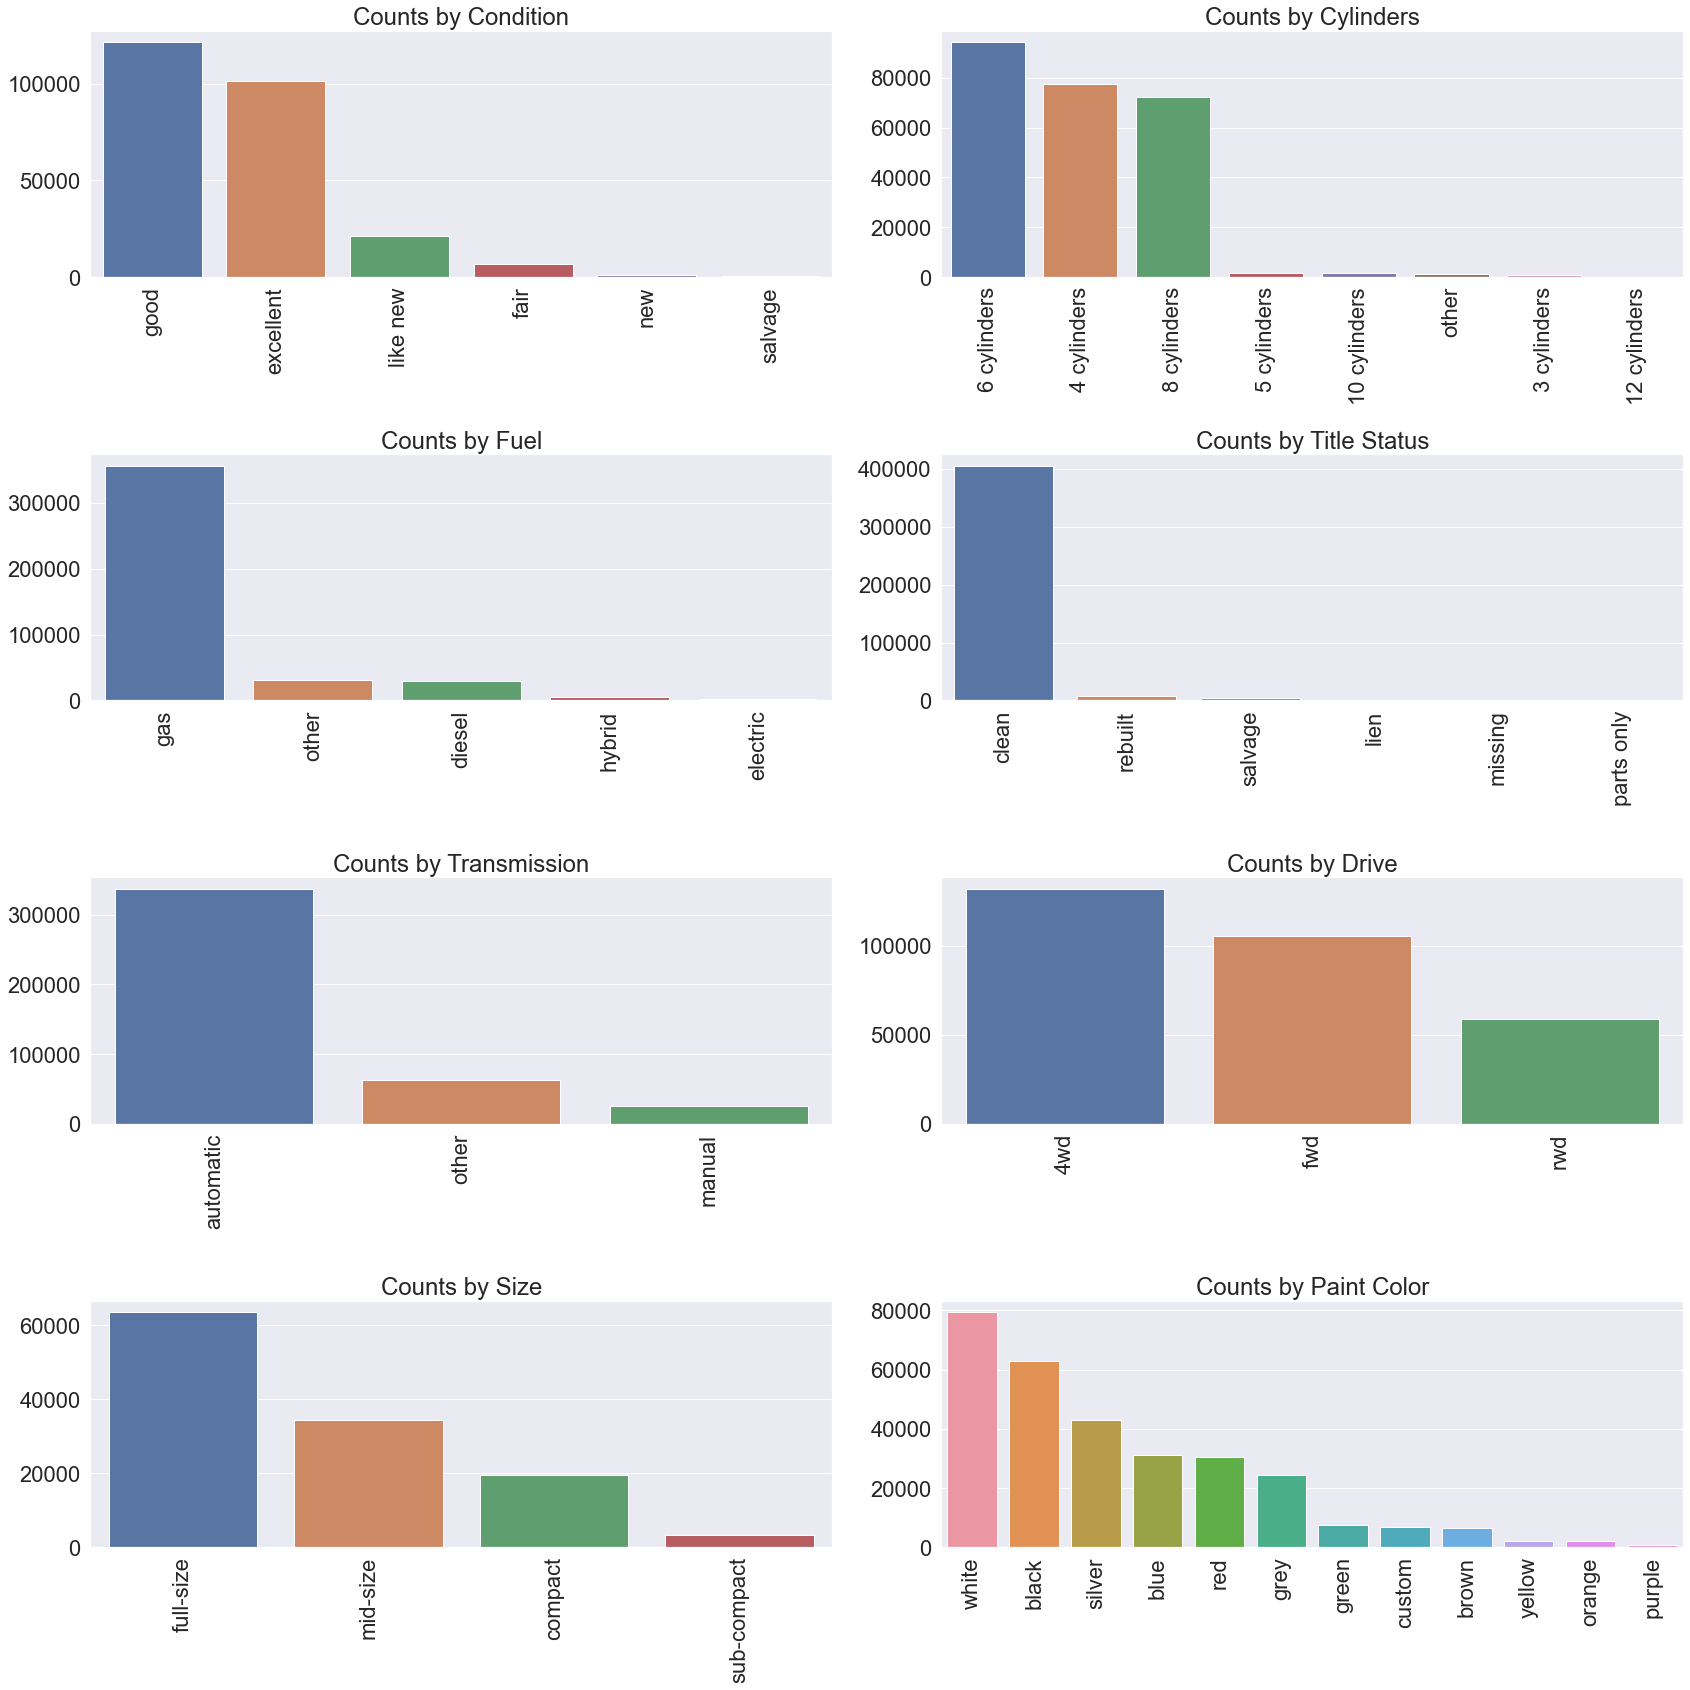

In [147]:
fig, ax = plt.subplots(3, 1, figsize=(24,16))
fig.suptitle('Categorical Features', y=1.)

plot0 = sns.countplot(x='manufacturer', data=df, ax=ax[0], order = df['manufacturer'].value_counts().index);
plot0.set_title("Counts by Manufacturer")
plot0.set_xticklabels(plot0.get_xticklabels(),rotation = 90)
plot0.set(xlabel=None, ylabel=None)
### ------------
### Observation: Seems relevant but large number of values, we should use some sort of clustering technique

plot1 = sns.countplot(x='state', data=df, ax=ax[1],order = df['state'].value_counts().index);
plot1.set_title("Counts by State")
plot1.set_xticklabels(plot1.get_xticklabels(),rotation = 90)
plot1.set(xlabel=None, ylabel=None)
### ------------
### Observation: Seems relevant but large number of values, we should use some sort of clustering technique

plot9 = sns.countplot(x='type', data=df, ax=ax[2],order = df['type'].value_counts().index);
plot9.set_title("Counts by Type")
plot9.set_xticklabels(plot9.get_xticklabels(),rotation = 90)
plot9.set(xlabel=None, ylabel=None)

fig.tight_layout()

fig, ax = plt.subplots(4, 2, figsize=(24,24))

plot2 = sns.countplot(x='condition', data=df, ax=ax[0,0],order = df['condition'].value_counts().index);
plot2.set_title("Counts by Condition")
plot2.set_xticklabels(plot2.get_xticklabels(),rotation = 90)
plot2.set(xlabel=None, ylabel=None)

plot3 = sns.countplot(x='cylinders', data=df, ax=ax[0,1],order = df['cylinders'].value_counts().index);
plot3.set_title("Counts by Cylinders")
plot3.set_xticklabels(plot3.get_xticklabels(),rotation = 90)
plot3.set(xlabel=None, ylabel=None)

plot4 = sns.countplot(x='fuel', data=df, ax=ax[1,0],order = df['fuel'].value_counts().index);
plot4.set_title("Counts by Fuel")
plot4.set_xticklabels(plot4.get_xticklabels(),rotation = 90)
plot4.set(xlabel=None, ylabel=None)

plot5 = sns.countplot(x='title_status', data=df, ax=ax[1,1],order = df['title_status'].value_counts().index);
plot5.set_title("Counts by Title Status")
plot5.set_xticklabels(plot5.get_xticklabels(),rotation = 90)
plot5.set(xlabel=None, ylabel=None)
### ------------
### Observation: almost all the titles have the clean status

plot6 = sns.countplot(x='transmission', data=df, ax=ax[2,0],order = df['transmission'].value_counts().index);
plot6.set_title("Counts by Transmission")
plot6.set_xticklabels(plot6.get_xticklabels(),rotation = 90)
plot6.set(xlabel=None, ylabel=None)

plot7 = sns.countplot(x='drive', data=df, ax=ax[2,1],order = df['drive'].value_counts().index);
plot7.set_title("Counts by Drive")
plot7.set_xticklabels(plot7.get_xticklabels(),rotation = 90)
plot7.set(xlabel=None, ylabel=None)

plot8 = sns.countplot(x='size', data=df, ax=ax[3,0],order = df['size'].value_counts().index);
plot8.set_title("Counts by Size")
plot8.set_xticklabels(plot8.get_xticklabels(),rotation = 90)
plot8.set(xlabel=None, ylabel=None)

plot10 = sns.countplot(x='paint_color', data=df, ax=ax[3,1],order = df['paint_color'].value_counts().index);
plot10.set_title("Counts by Paint Color")
plot10.set_xticklabels(plot10.get_xticklabels(),rotation = 90)
plot10.set(xlabel=None, ylabel=None)

fig.tight_layout()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [91]:
df_final = df.copy()

In [92]:
## Based on the discussion from Data Understanding section, we can drop the following features that are not going to be useful for modeling
df_final.drop(columns=['id','region','model','VIN','title_status'], inplace=True)
print(df_final.shape)

(426880, 13)


#### Prepare Numeric Columns

In [93]:
## Drop outliers based on IQR rule
for col in df_final.select_dtypes(include='number').columns:
    size_before = df_final.shape[0]
    Q3 = np.quantile(df_final.dropna(subset=col)[col], 0.75)
    Q1 = np.quantile(df_final.dropna(subset=col)[col], 0.25)
    IQR = Q3 - Q1
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    df_final.drop(df_final[(df_final[col] < lower_range) | (df_final[col] > upper_range)].index , inplace=True)
    size_after = df_final.shape[0]
    
    print('Removed {:.2f}% percentage of {}.'.format((size_before-size_after)*100./size_before, col))

Removed 1.92% percentage of price.
Removed 3.70% percentage of year.
Removed 0.90% percentage of odometer.


<AxesSubplot:xlabel='price', ylabel='Count'>

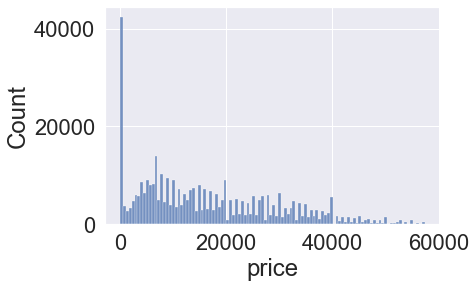

In [94]:
sns.histplot(df_final['price'])

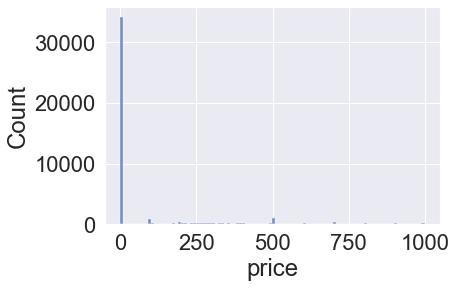

In [95]:
# By observation there are a lot cars with low prices less than 1000$
sns.histplot(df_final[df_final['price']<1000]['price'], bins=100);

Cleaned 11.26% percentage of price.


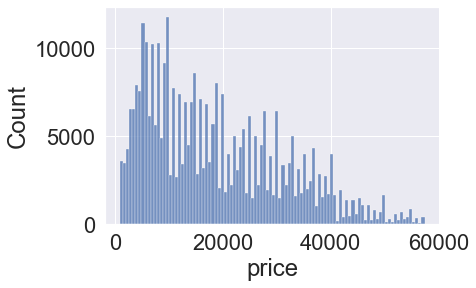

In [96]:
# Let us drop these
size_before = df_final.shape[0]
df_final.drop(df_final[df_final['price']<1000].index , inplace=True)
size_after = df_final.shape[0]
print('Cleaned {:.2f}% percentage of {}.'.format((size_before-size_after)*100./size_before, 'price'))

sns.histplot(df_final['price'], bins=100);

#### Prepare Object Columns

Goal is to reduce the number of unique values, so we cluster variables by combining them with similar price statistics 

In [97]:
# Cylinders Column
df_final.groupby('cylinders')['price'].describe().sort_values(by=['mean'])

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
5 cylinders,1559.0,7877.354715,5717.914615,1000.0,4375.0,6500.0,9250.00,56000.0
4 cylinders,67547.0,11641.691193,7782.446186,1000.0,5995.0,9600.0,15414.50,57000.0
3 cylinders,494.0,13621.945344,8592.848900,1000.0,6720.0,10999.0,19647.75,49820.0
other,785.0,18156.420382,14019.294183,1000.0,6900.0,13999.0,25999.00,56999.0
6 cylinders,81783.0,18599.542704,12618.834664,1000.0,7000.0,15999.0,28590.00,57321.0
10 cylinders,1055.0,21045.601896,12237.705591,1500.0,10500.0,19999.0,28999.50,57000.0
8 cylinders,55452.0,23339.840060,13742.521840,1000.0,11396.5,22450.0,34500.00,57095.0
12 cylinders,98.0,26240.387755,14641.459419,1947.0,12900.0,27750.0,38850.00,53500.0


In [98]:
# Lets combine 3 cylinders to other, given similar mean price 
df_final['cylinders'] = np.where(df_final['cylinders'].isin(['3 cylinders']),'other',
                                df_final['cylinders'])


In [99]:
df_final['cylinders'].unique().tolist()

[nan,
 '8 cylinders',
 '6 cylinders',
 '4 cylinders',
 '5 cylinders',
 'other',
 '10 cylinders',
 '12 cylinders']

In [100]:
# State Column - Can we reorganize by US cencus regions
# Northeast - PA, NY, VT, NH, MA, CT, RI, ME, NJ, 
# Midwest - ND, SD, NE, KS, MN, IA, MO, WI, IL, IN, MI, OH
# West - WA, OR, CA, ID, MT, WH, CO, UT, AZ, NM, NV, AK, HI
# South - TX, OK, AR, LA, MS, AL, TN, KY, WV, DC, MD, DE, NC, SC, GA, FL
df_final['state'] = np.where(df_final['state'].isin(['pa','ny','vt','nh','ma','ct','ri','me','nj']),'northeast',
                                df_final['state'])
df_final['state'] = np.where(df_final['state'].isin(['nd','sd','ne','ks','mn','ia','mo','wi','il','in','mi','oh']),'midwest',
                                df_final['state'])
df_final['state'] = np.where(df_final['state'].isin(['wa','or','ca','id','mt','wh','co','ut','az','nm','nv','ak','hi','wy']),'west',
                                df_final['state'])
df_final['state'] = np.where(df_final['state'].isin(['tx','ok','ar','la','ms','al','tn','ky','wv','dc','md','de','nc','sc','ga','fl','va']),'south',
                                df_final['state'])

In [101]:
df_final['state'].unique().tolist()

['west', 'south', 'northeast', 'midwest']

In [102]:
# Fuel Column - Let's combine `hybrid` and `gas`, `electric` with `other`
df_final['fuel'] = np.where(df_final['fuel'].isin(['hybrid']),'gas',
                                df_final['fuel'])
df_final['fuel'] = np.where(df_final['fuel'].isin(['electric']),'other',
                                df_final['fuel'])

In [103]:
df_final['fuel'].unique().tolist()

[nan, 'gas', 'other', 'diesel']

In [104]:
# Condition Column - Let's combine `salvage` and `fair` together
df_final['condition'] = np.where(df_final['condition'].isin(['salvage']),'fair',
                                df_final['condition'])

In [105]:
df_final['condition'].unique().tolist()

[nan, 'good', 'excellent', 'fair', 'like new', 'new']

In [106]:
# Size Column - Let's combine `sub-compact` and `compact` together
df_final['size'] = np.where(df_final['size'].isin(['sub-compact']),'compact',
                                df_final['size'])

In [107]:
df_final['size'].unique().tolist()

[nan, 'full-size', 'mid-size', 'compact']

In [108]:
# Models Column
df_final.groupby('manufacturer')['price'].describe().sort_values(by=['mean'])

,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
morgan,2.0,1400.000000,565.685425,1000.0,1200.00,1400.0,1600.00,1800.0
mercury,890.0,4657.361798,2285.511665,1000.0,3000.00,4471.0,5990.00,32500.0
ferrari,4.0,5263.500000,5841.597356,2034.0,2034.00,2510.0,5739.50,14000.0
saturn,1023.0,5342.803519,4167.667402,1000.0,3100.00,4400.0,5500.00,22000.0
pontiac,1733.0,6134.709752,5430.735797,1000.0,3400.00,4495.0,6500.00,48500.0
land rover,10.0,11113.300000,13206.184612,3199.0,5123.75,7497.5,9625.00,47995.0
chrysler,5302.0,11126.597699,8193.023553,1000.0,4990.00,8499.0,15893.25,54985.0
honda,18903.0,11940.041898,8249.629304,1000.0,5750.00,9500.0,16500.00,55000.0
hyundai,9009.0,12266.840715,7010.818594,1000.0,6950.00,10988.0,16990.00,49788.0


In [109]:
# Colors Column
df_final.groupby('paint_color')['price'].describe().sort_values(by=['count'])

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
purple,544.0,13533.119485,11365.957300,1000.0,5000.0,9900.0,18931.25,55000.0
yellow,1546.0,18399.222510,12499.024384,1000.0,7125.0,15995.0,28590.00,56995.0
orange,1547.0,18707.402715,10863.112537,1000.0,9724.5,18590.0,25590.00,56990.0
custom,5533.0,16010.179288,11411.242582,1000.0,6999.0,12995.0,21995.00,56999.0
brown,5544.0,16500.009380,11948.269871,1000.0,6400.0,12999.0,25990.00,54999.0
green,5859.0,13143.014337,11108.970949,1000.0,4850.0,8995.0,17900.00,57000.0
grey,21351.0,15159.564845,11122.782567,1000.0,6990.0,11900.0,20000.00,56999.0
red,25642.0,19122.530575,12221.743752,1000.0,8495.0,16988.0,28000.00,57000.0
blue,26889.0,16998.524824,11898.959349,1000.0,6995.0,14000.0,24995.00,57321.0


In [110]:
# Lets combine yellow, orange and purple with custom category into other
df_final['paint_color'] = np.where(df_final['paint_color'].isin(['purple','yellow','orange','custom']),'other',
                                df_final['paint_color'])


In [111]:
df_final['paint_color'].unique().tolist()

[nan,
 'white',
 'blue',
 'red',
 'black',
 'silver',
 'grey',
 'brown',
 'other',
 'green']

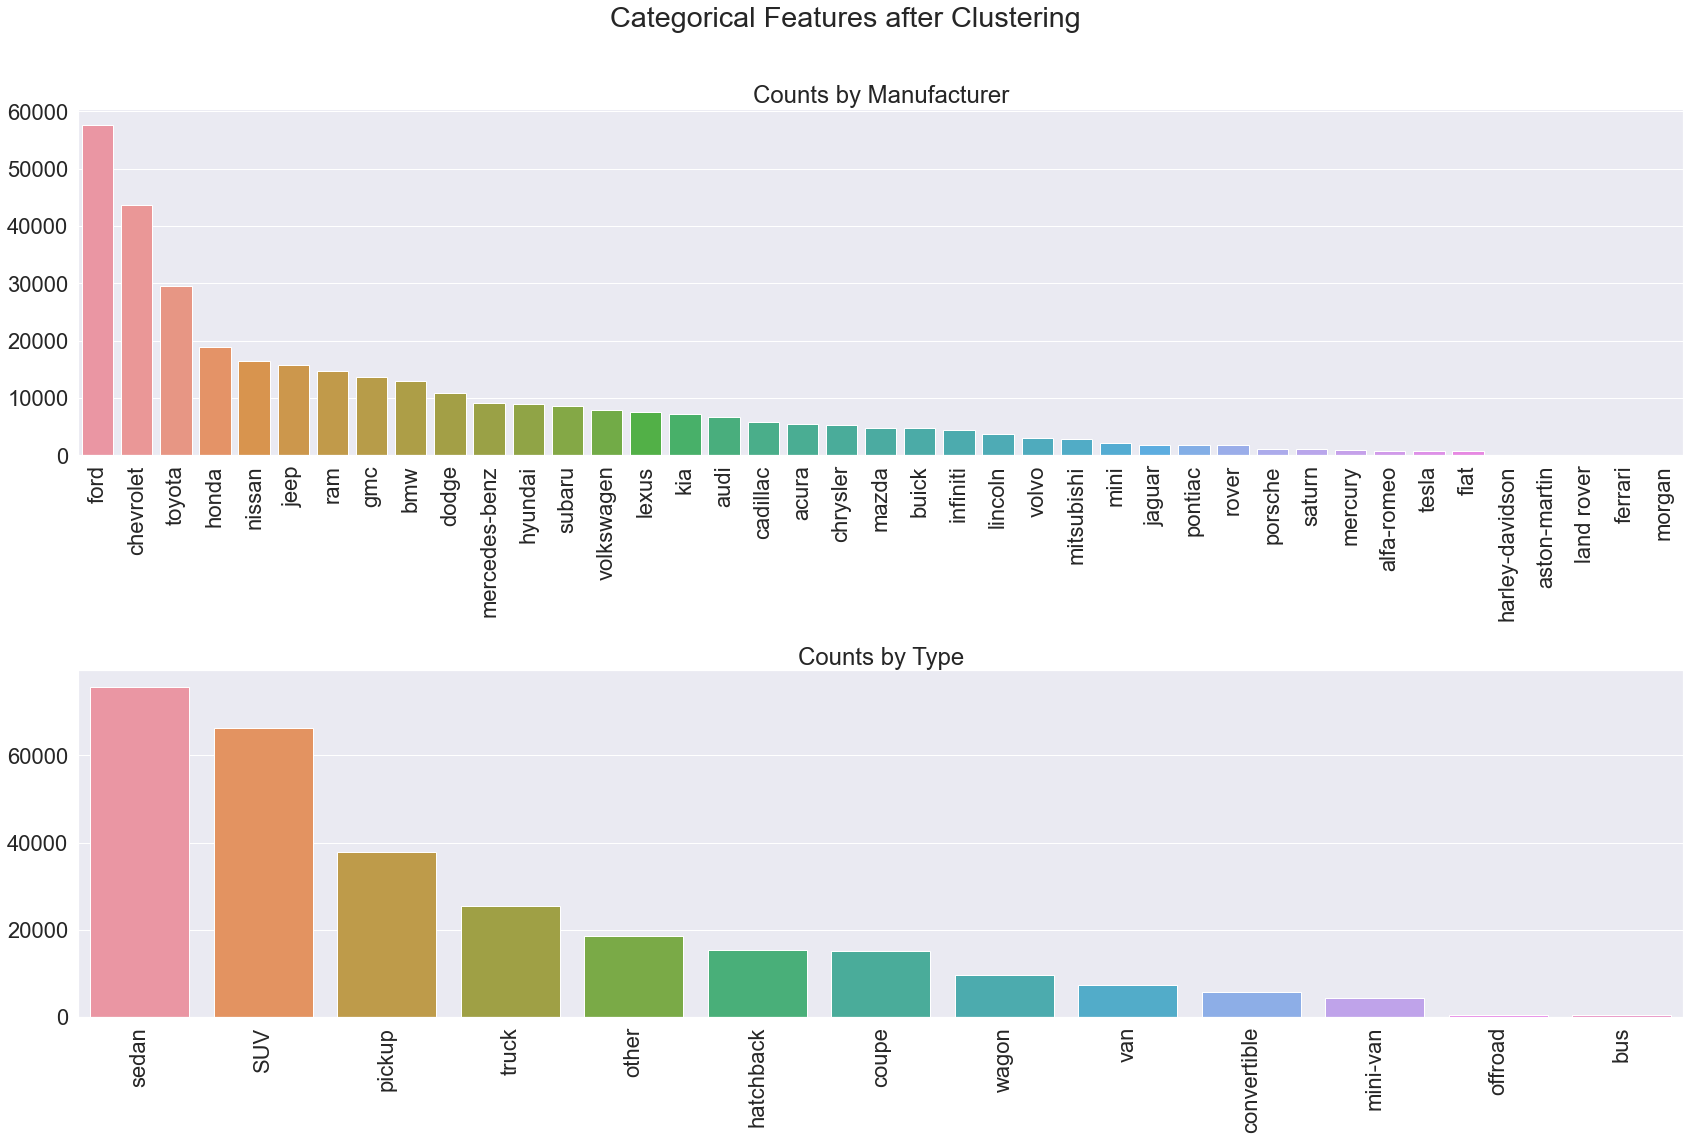

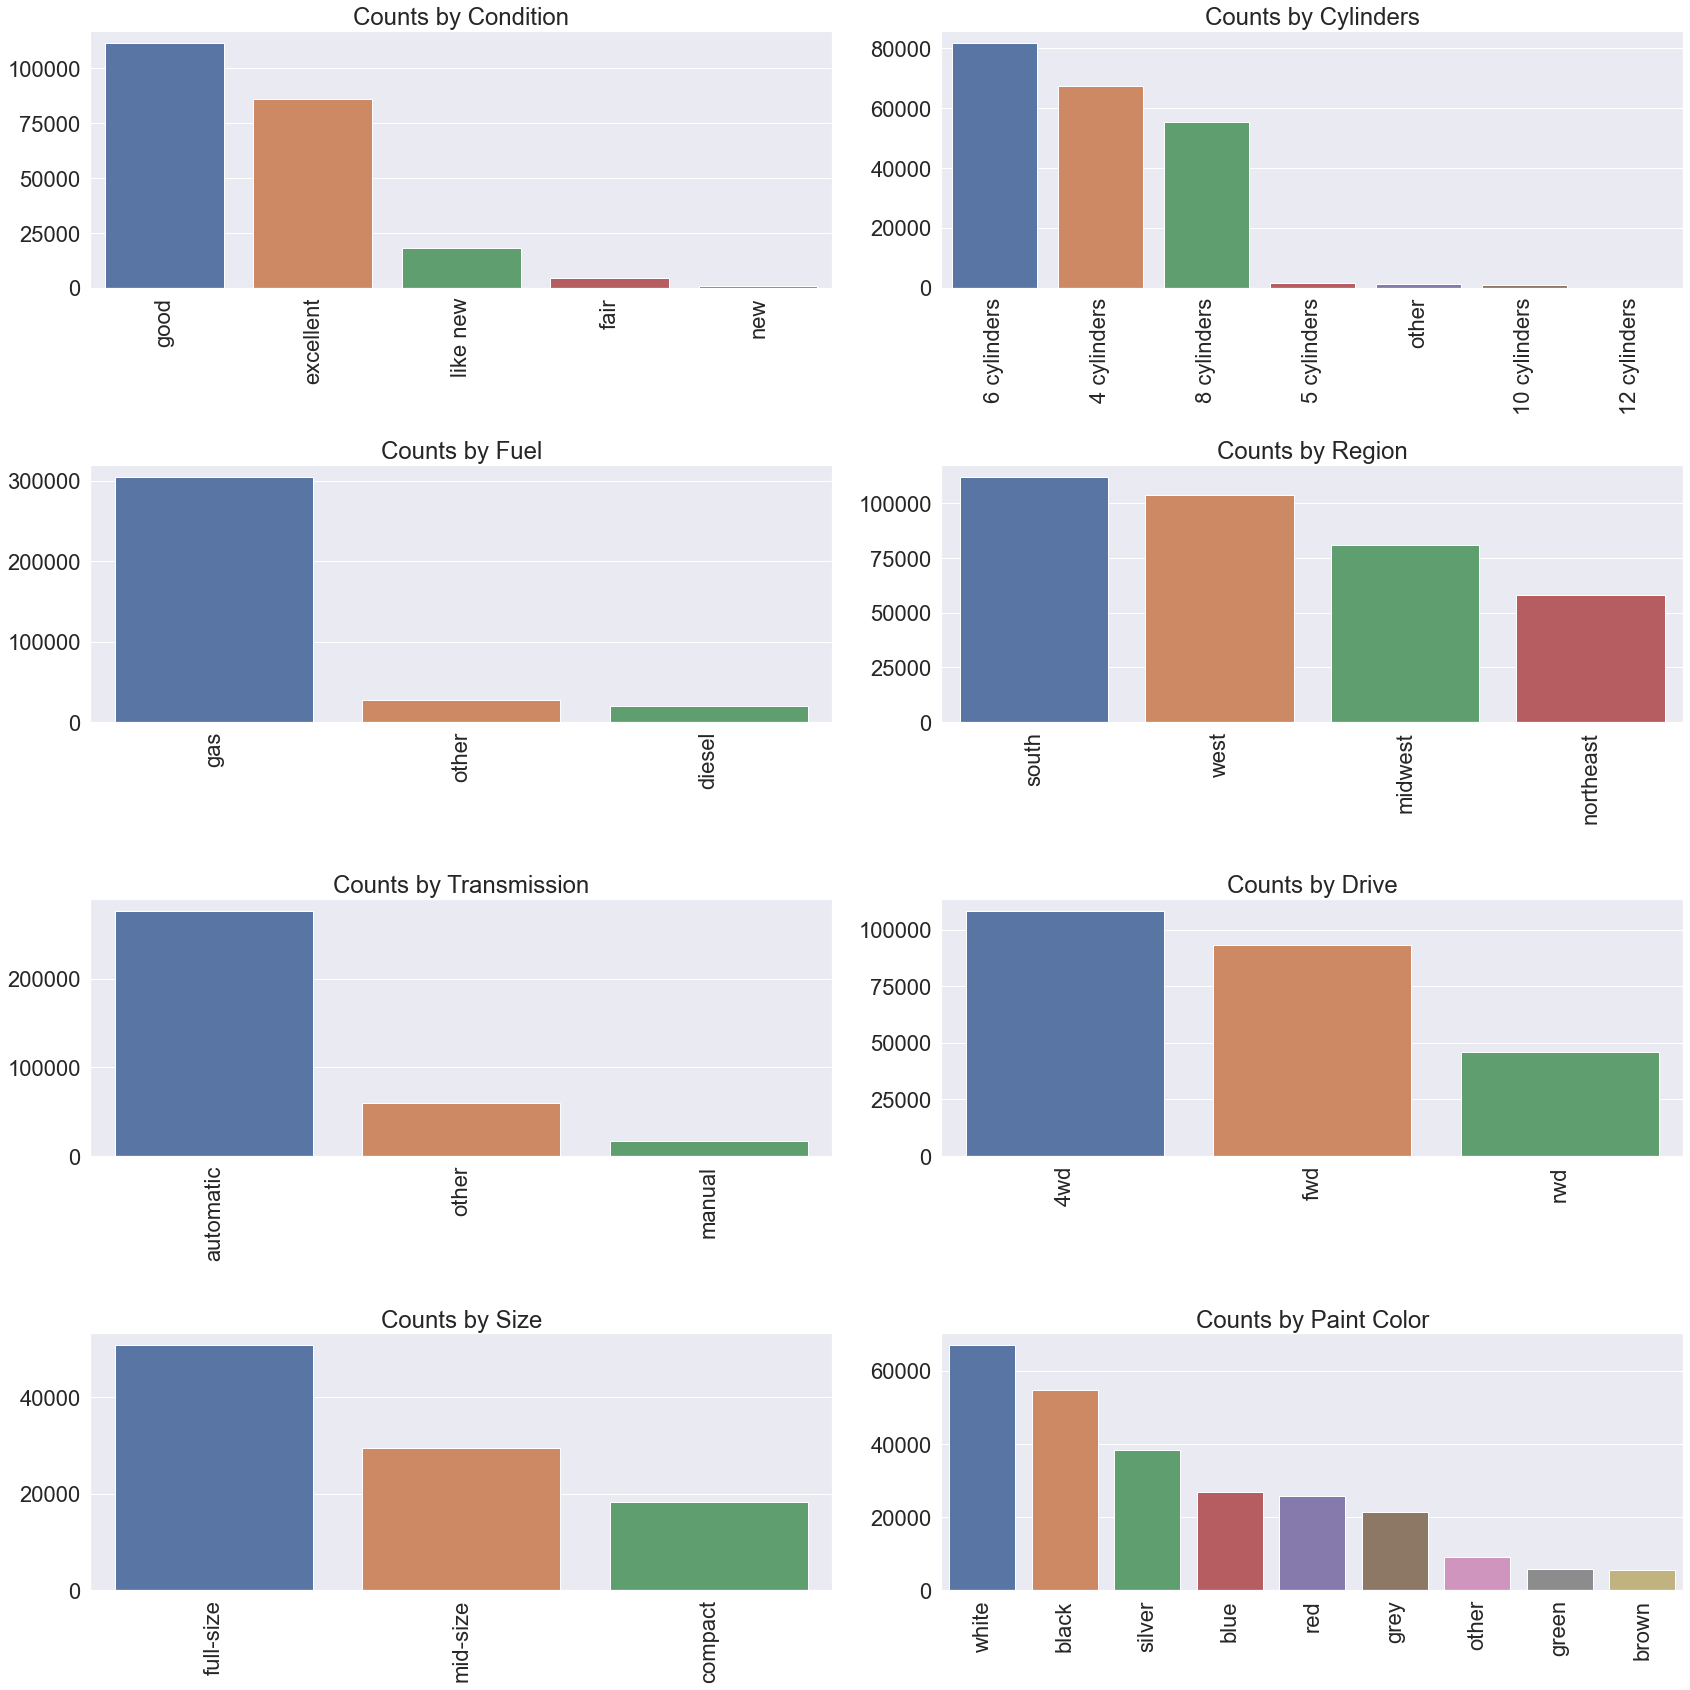

In [148]:
fig, ax = plt.subplots(2, 1, figsize=(24,16))
fig.suptitle('Categorical Features after Clustering', y=1.)

plot0 = sns.countplot(x='manufacturer', data=df_final, ax=ax[0], order = df_final['manufacturer'].value_counts().index);
plot0.set_title("Counts by Manufacturer")
plot0.set_xticklabels(plot0.get_xticklabels(),rotation = 90)
plot0.set(xlabel=None, ylabel=None)
### ------------
### Observation: Seems relevant but large number of values, we should use some sort of clustering technique

plot9 = sns.countplot(x='type', data=df_final, ax=ax[1],order = df_final['type'].value_counts().index);
plot9.set_title("Counts by Type")
plot9.set_xticklabels(plot9.get_xticklabels(),rotation = 90)
plot9.set(xlabel=None, ylabel=None)

fig.tight_layout()

fig, ax = plt.subplots(4, 2, figsize=(24,24))

plot2 = sns.countplot(x='condition', data=df_final, ax=ax[0,0],order = df_final['condition'].value_counts().index);
plot2.set_title("Counts by Condition")
plot2.set_xticklabels(plot2.get_xticklabels(),rotation = 90)
plot2.set(xlabel=None, ylabel=None)

plot3 = sns.countplot(x='cylinders', data=df_final, ax=ax[0,1],order = df_final['cylinders'].value_counts().index);
plot3.set_title("Counts by Cylinders")
plot3.set_xticklabels(plot3.get_xticklabels(),rotation = 90)
plot3.set(xlabel=None, ylabel=None)

plot1 = sns.countplot(x='state', data=df_final, ax=ax[1,1],order = df_final['state'].value_counts().index);
plot1.set_title("Counts by Region")
plot1.set_xticklabels(plot1.get_xticklabels(),rotation = 90)
plot1.set(xlabel=None, ylabel=None)

plot4 = sns.countplot(x='fuel', data=df_final, ax=ax[1,0],order = df_final['fuel'].value_counts().index);
plot4.set_title("Counts by Fuel")
plot4.set_xticklabels(plot4.get_xticklabels(),rotation = 90)
plot4.set(xlabel=None, ylabel=None)

### ------------
### Observation: almost all the titles have the clean status

plot6 = sns.countplot(x='transmission', data=df_final, ax=ax[2,0],order = df_final['transmission'].value_counts().index);
plot6.set_title("Counts by Transmission")
plot6.set_xticklabels(plot6.get_xticklabels(),rotation = 90)
plot6.set(xlabel=None, ylabel=None)

plot7 = sns.countplot(x='drive', data=df_final, ax=ax[2,1],order = df_final['drive'].value_counts().index);
plot7.set_title("Counts by Drive")
plot7.set_xticklabels(plot7.get_xticklabels(),rotation = 90)
plot7.set(xlabel=None, ylabel=None)

plot8 = sns.countplot(x='size', data=df_final, ax=ax[3,0],order = df_final['size'].value_counts().index);
plot8.set_title("Counts by Size")
plot8.set_xticklabels(plot8.get_xticklabels(),rotation = 90)
plot8.set(xlabel=None, ylabel=None)

plot10 = sns.countplot(x='paint_color', data=df_final, ax=ax[3,1],order = df_final['paint_color'].value_counts().index);
plot10.set_title("Counts by Paint Color")
plot10.set_xticklabels(plot10.get_xticklabels(),rotation = 90)
plot10.set(xlabel=None, ylabel=None)

fig.tight_layout()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Test/Train Split

In [113]:
X = df_final.drop(columns=['price'])
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

print(f'{X_train.shape},{X_test.shape}')
print(f'{y_train.shape},{y_test.shape}')

(265960, 12),(88654, 12)
(265960,),(88654,)


##### Pipeline Preprocessing 

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder

numeric_columns = list(X_train.select_dtypes(include='number').columns)
numeric_columns_transformer = Pipeline(
    steps = [
        ('imputer',IterativeImputer(n_nearest_features=3, sample_posterior=True)),
        ('scaler', StandardScaler())
    ]
)

condition_column = ['condition']
condition_column_transformer = Pipeline(
    steps = [
        ('encoder', OrdinalEncoder(categories=[[np.nan, 'fair', 'salvage', 'good', 'excellent', 'like new', 'new']])),
        ('imputer', IterativeImputer(n_nearest_features=3, sample_posterior=True))
    ]
)

object_columns = list(X_train.drop(columns=['condition']).select_dtypes(include='object').columns)
object_columns_transformer = Pipeline(
    steps = [
        ('encoder', TargetEncoder()),
        ('imputer', IterativeImputer(n_nearest_features=3, sample_posterior=True))
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric',numeric_columns_transformer,numeric_columns),
        ('condition',condition_column_transformer,condition_column),
        ('object',object_columns_transformer,object_columns)
    ]
)

#### 1. Linear Regression Model

In [115]:
## Lets evaluate Linear Regressions
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('linear', TransformedTargetRegressor(regressor=None, func=np.log, inverse_func=np.exp))
    ]
)
param_dict =  {}
grid = GridSearchCV(estimator=pipe, param_grid=param_dict)
grid.fit(X_train, y_train)
print(f'Linear Regression - Best Score: {grid.best_score_}, Best Params: {grid.best_params_}')

Linear Regression - Best Score: 0.6553336630098519, Best Params: {}


#### 2. Ridge Regression Model

In [116]:
from sklearn.linear_model import Ridge

## Lets evaluate Ridge Regressions
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('ridge', TransformedTargetRegressor(regressor=Ridge(), func=np.log, inverse_func=np.exp))
    ]
)
param_dict = {'ridge__regressor__alpha': np.logspace(0, 10, 15)}
grid = GridSearchCV(estimator=pipe, param_grid=param_dict)
grid.fit(X_train, y_train)
print(f'Ridge Regression - Best Score: {grid.best_score_}, Best Params: {grid.best_params_}')

Ridge Regression - Best Score: 0.6558865083415691, Best Params: {'ridge__regressor__alpha': 5.179474679231212}


#### 3. Lasso Regression Model

In [117]:
from sklearn.linear_model import Lasso

## Lets evaluate Lasso Regressions
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lasso', TransformedTargetRegressor(regressor=Lasso(), func=np.log, inverse_func=np.exp))
    ]
)
param_dict = {'lasso__regressor__alpha': np.logspace(-5, 3, 9)}
grid = GridSearchCV(estimator=pipe, param_grid=param_dict)
grid.fit(X_train, y_train)
print(f'Lasso Regression - Best Score: {grid.best_score_}, Best Params: {grid.best_params_}')

Lasso Regression - Best Score: 0.6572418831282638, Best Params: {'lasso__regressor__alpha': 0.01}


#### 4. Random Forest Regression Model

In [118]:
from sklearn.ensemble import RandomForestRegressor

## Lets evaluate Random Forest Regressions
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('random_forest', TransformedTargetRegressor(regressor=RandomForestRegressor(), func=np.log, inverse_func=np.exp))
    ]
)
param_dict = {
    "random_forest__regressor__n_estimators": [100, 200],
    "random_forest__regressor__max_depth": [10,30],
    "random_forest__regressor__min_samples_leaf": [1],
}
grid = GridSearchCV(estimator=pipe, param_grid=param_dict)
grid.fit(X_train, y_train)
print(f'Random Forest Regression - Best Score: {grid.best_score_}, Best Params: {grid.best_params_}')

Random Forest Regression - Best Score: 0.9117409395536586, Best Params: {'random_forest__regressor__max_depth': 30, 'random_forest__regressor__min_samples_leaf': 1, 'random_forest__regressor__n_estimators': 200}


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on the models above Random Forest Regressor appears tob e the best model that will suite our requirements

| Model | Best Score | Best Parameters |
|-------|------------|-----------------|
|Linear Regression | 0.6553336630098519 | {} |
|Ridge Regression | 0.6558865083415691 | {'alpha': 5.179474679231212} |
|Lasso Regression | 0.6572418831282638 |  {'alpha': 0.01} | 
|Random Forest Regression | 0.9117409395536586 | {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 200} |

In [122]:
# Setup the final model for our evaluation
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('random_forest', TransformedTargetRegressor(regressor=RandomForestRegressor(max_depth=30,n_estimators=200,min_samples_leaf=1),
                                          func=np.log, inverse_func=np.exp))
    ]
)
pipe.fit(X_train, y_train)
y_predictions_train = pipe.predict(X_train)
y_predictions_test = pipe.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [126]:
print(f'{"="*10} Training  {"="*10}')
print('R2 Score: {:.5f}'.format(pipe.score(X_train, y_train)))
print('RMSE: {:.5f}'.format(mean_squared_error(y_train, y_predictions_train, squared=False)))
print('MSE: {:.5f}'.format(mean_squared_error(y_train, y_predictions_train, squared=True)))
print('MAE: {:.5f}'.format(mean_absolute_error(y_train, y_predictions_train)))

========== Training  ==========
R2 Score: 0.98307
RMSE: 1628.27842
MSE: 2651290.60190
MAE: 722.44805


In [127]:
print(f'{"="*10} Test  {"="*10}')
print('R2 Score: {:.5f}'.format(pipe.score(X_test, y_test)))
print('RMSE: {:.5f}'.format(mean_squared_error(y_test, y_predictions_test, squared=False)))
print('MSE: {:.5f}'.format(mean_squared_error(y_test, y_predictions_test, squared=True)))
print('MAE: {:.5f}'.format(mean_absolute_error(y_test, y_predictions_test)))

========== Test  ==========
R2 Score: 0.91608
RMSE: 3644.19655
MSE: 13280168.48696
MAE: 1782.21157


Our model appears be performing pretty well to the training set with **98.3%** accuracy, and with test set **91.6%** accuracy. 

##### Next Steps and Opportunities

* The hyper parameters were found only on a small search space, there is room for improvement with better hardware
* The model seems to be a little overfit for the training set, there is opportunity to tune the parameters to reduce overfitting

In [188]:
important_features = pd.Series(pipe.named_steps['random_forest'].regressor_.feature_importances_, index=X.columns)
df_features = important_features.to_frame()

df_features = df_features.reset_index()
df_features.columns = ['feature','importance']
df_features.sort_values('importance',ascending=False)

,feature,importance
0,year,0.497175
1,manufacturer,0.125161
9,type,0.086870
3,cylinders,0.078368
7,drive,0.048782
4,fuel,0.040776
5,odometer,0.039471
2,condition,0.030285
11,state,0.019181
10,paint_color,0.018438


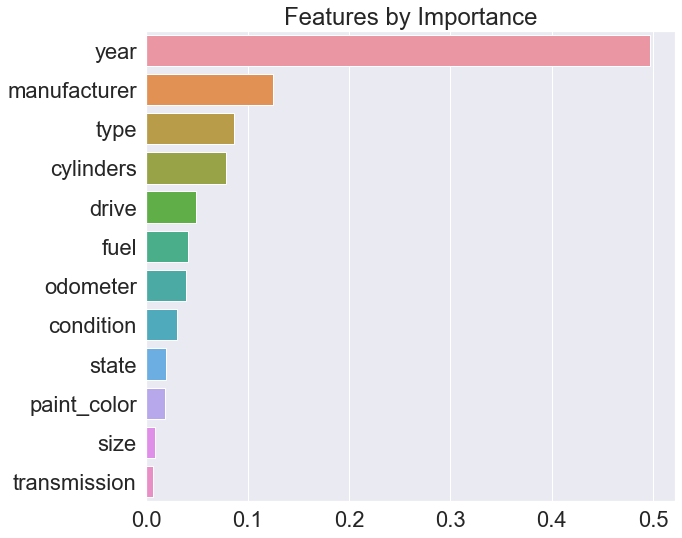

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

plot0 = sns.barplot(data=df_features.sort_values('importance',ascending=False), x="importance", y="feature")
plot0.set_title("Features by Importance")
plot0.set(xlabel=None, ylabel=None)

fig.tight_layout()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [191]:
df_features.sort_values(['importance'],ascending=False).head(5)

,feature,importance
0,year,0.497175
1,manufacturer,0.125161
9,type,0.086870
3,cylinders,0.078368
7,drive,0.048782


Based on our analysis, these are the most important features of a used car that affect the price

**Year of Manufacture**: There is a strong positive correlation between the car's year of manufacture and the price. Newer the car, higher the price. This is one metric which has the greatest influence on the car's price.

**Manufacturer**: Cars from certain manufacturers like Ferari tend to be expensive compared to morgan and mercury. Resale value basically depends on the manufacturer.

**Type**: Type of the car (SUV, Sedan, Minivan etc.,) is the next biggest influence on resale value, in general price also depends on this

**Cylinders**: Number of cylinders has a positive correlation with the price, as higher cylinders, mean usually more power and consequently more price

**Dive**: AWD cars tend influence price more than the FWD and RWD

Most cars in the dataset tend to be in `excellent`, `like new` or `good` condition, that is why they tend not to have strong influence in the ultimate price, which was counter intutive.

The least important features were **size** and **transmission**. Correlation of **size** was better captured by the **type**, **cylinders** and **drive** which is why it didn't have a significant correlation by itself, also most vehicles had `automatic` transmission and thus did not siginificantly influence price there as well